In [174]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

np.random.seed(1234)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [193]:
def plot_y(y_test, y_pred):
  plt.scatter(y_test, y_pred)
  plt.xlabel('True Values [MPG]')
  plt.ylabel('Predictions [MPG]')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0,plt.xlim()[1]])
  plt.ylim([0,plt.ylim()[1]])
  plt.plot([-100, 100], [-100, 100])
  plt.show()

In [573]:
def handle(file):
    df = pd.read_csv(file+'.csv')
    
    # Alpha
    df['alpha_inv'] = 1/df['alpha']
    
    # Alpha
    #df['alpha1'] = 0
    #df.loc[df['alpha']==0.01,['alpha1']] = 1
    #df['alpha2'] = 0
    #df.loc[df['alpha']==0.001,['alpha2']] = 1
    #df['alpha3'] = 0
    #df.loc[df['alpha']==0.0001,['alpha3']] = 1
    
    # L1, L2
    df['l1'] = 0
    df['l2'] = 0
    df.loc[df['penalty']=='none',['l1','l2']] = 0
    df.loc[df['penalty']=='l1',['l1']] = 1
    df.loc[df['penalty']=='l1',['l2']] = 0
    df.loc[df['penalty']=='l2',['l1']] = 0
    df.loc[df['penalty']=='l2',['l2']] = 1
    df.loc[df['penalty']=='elasticnet',['l1']] = df.loc[df['penalty']=='elasticnet',['l1_ratio']]['l1_ratio']
    df.loc[df['penalty']=='elasticnet',['l2']] = (1 - df.loc[df['penalty']=='elasticnet',['l1_ratio']])['l1_ratio']
    df['l1_inv'] = 1/(df['l1']+1)
    df['l2_inv'] = 1/(df['l2']+1)
    
    # n_jobs
    df.loc[df['n_jobs']==-1,'n_jobs'] = 8
    df['n_jobs'] = 1/df['n_jobs']
    
    # classes
    df['n_clusters'] = df['n_classes']*df['n_clusters_per_class']

    # Drop  
    df = df.drop(['penalty', 'l1_ratio', 'id', 'random_state'], axis = 1)
    
    # linear
    r = []
    if 'time' in df.columns:
        r.append('time')
    if 'linear' in df.columns:
        r.append('linear')
    if 'linear2' in df.columns:
        r.append('linear2')
    
    poly = sklearn.preprocessing.PolynomialFeatures(2)
    if file=='train':
        global reg1
        global reg2
        global reg3
        reg1 = linear_model.LinearRegression()
        reg2 = linear_model.Ridge()
        reg3 = RandomForestRegressor(50)
        reg1.fit(df.drop(r,axis=1),df['time'])
        reg2.fit(poly.fit_transform(df.drop(r,axis=1)),df['time'])
        reg3.fit(df.drop(r,axis=1),df['time'])
        
    df['linear'] = reg1.predict(df.drop(r,axis=1))
    r.append('linear')
    df['linear2'] = reg2.predict(poly.fit_transform(df.drop(r,axis=1)))
    r.append('linear2')
    df['tree'] = reg3.predict(df.drop(r,axis=1))
    
    #df = df.drop(['max_iter','n_classes','n_clusters_per_class','n_informative',
    #              'flip_y','scale','alpha_inv','l1','l2','n_clusters'], axis = 1)
    
    display(df.head())
    df.to_csv(file+"_modified.csv", index=False)

In [574]:
handle('train')
handle('test')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.900172e-19
  overwrite_a=True).T


,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time,alpha_inv,l1,l2,l1_inv,l2_inv,n_clusters,linear,linear2,tree
0,0.0001,260,0.125,888,693,6,5,7,0.054888,88.253265,0.306373,10000.0,0.000000,0.000000,1.000000,1.000000,30,0.708456,-1.133535,0.362617
1,0.0100,586,0.500,210,159,10,3,10,0.079541,9.841284,0.903029,100.0,0.654141,0.345859,0.604544,0.743020,30,2.165126,0.584406,3.465488
2,0.0100,518,1.000,788,531,7,4,8,0.053867,69.568247,10.453464,100.0,0.851020,0.148980,0.540243,0.870337,28,6.932598,9.190270,8.641791
3,0.0001,893,1.000,181,204,4,2,7,0.041888,53.843158,0.184302,10000.0,0.000000,0.000000,1.000000,1.000000,8,1.485275,-0.759298,0.552983
4,0.0100,400,0.125,561,323,9,5,12,0.064665,82.300420,1.106038,100.0,0.484963,0.515037,0.673417,0.660050,45,2.019344,1.578294,1.002701


,alpha,max_iter,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,alpha_inv,l1,l2,l1_inv,l2_inv,n_clusters,linear,linear2,tree
0,0.0010,390,0.1250,760,373,2,2,6,0.075282,33.163360,1000.0,0.000000,1.000000,1.000000,0.500000,4,-2.506779,0.316791,0.310717
1,0.0010,452,0.0625,877,321,8,5,9,0.096269,42.781182,1000.0,0.883440,0.116560,0.530943,0.895608,40,2.384028,0.462773,2.313029
2,0.0100,1016,1.0000,588,323,8,5,8,0.077733,43.522123,100.0,0.840487,0.159513,0.543334,0.862431,40,8.006948,12.557575,7.666818
3,0.0001,887,0.1250,225,773,6,4,9,0.042324,47.321246,10000.0,0.000000,0.000000,1.000000,1.000000,24,0.397747,-1.232447,0.397290
4,0.0001,1224,0.1250,708,509,8,5,12,0.055850,54.050923,10000.0,0.000000,0.000000,1.000000,1.000000,40,3.946875,1.123862,1.185416


In [552]:
df = pd.read_csv("train_modified.csv")

y = df["time"]
minone = min(y)
X = df.drop(["time"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [559]:
# LinearRegression 3.5
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
reg = RandomForestRegressor()

In [560]:
poly = sklearn.preprocessing.PolynomialFeatures(1)

In [561]:
reg.fit(poly.fit_transform(X_train), y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

0.4486727505867332
10.862978865028879


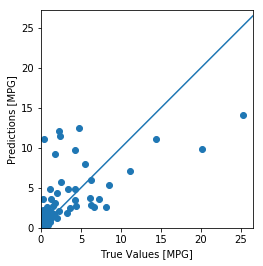

In [562]:
print(cross_val_score(reg, poly.fit_transform(X_train), y_train, cv=5).mean())
y_pred = reg.predict(poly.fit_transform(X_test))
y_pred[y_pred < 0] = minone
print(mean_squared_error(y_test, y_pred))
plot_y(y_test, y_pred)

In [543]:
X_train.values

array([[ 2.76000000e+02,  5.00000000e-01,  6.23000000e+02, ...,
        -1.76638824e-01,  9.65574433e-01,  4.37994692e-01],
       [ 1.06000000e+02,  5.00000000e-01,  5.90000000e+02, ...,
         4.75960689e-01,  1.89676513e+00,  1.50144051e+00],
       [ 9.26000000e+02,  2.50000000e-01,  7.36000000e+02, ...,
         5.53520903e+00,  3.69684887e+00,  2.14944254e+00],
       ...,
       [ 7.96000000e+02,  1.25000000e-01,  4.31000000e+02, ...,
         9.58516630e-01,  1.42141994e+00,  1.79390350e+00],
       [ 1.99000000e+02,  1.25000000e-01,  5.55000000e+02, ...,
         2.17553222e-02,  9.56693325e-02,  2.44722748e-01],
       [ 6.66000000e+02,  2.50000000e-01,  8.96000000e+02, ...,
         5.27303483e-02, -1.66044653e-01,  2.92501669e-01]])

In [544]:
df_test = pd.read_csv('test_modified.csv')
sub = pd.read_csv('sample_submission.csv')
sub['time'] = reg.predict(poly.fit_transform(df_test))
sub.loc[sub['time']<0,'time'] = minone
sub.to_csv('submission.csv', index=False)

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


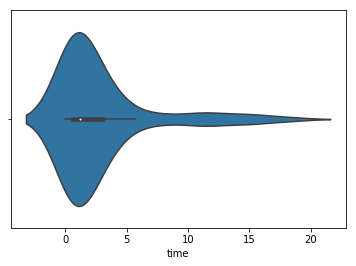

In [545]:
import seaborn as sns
plt.figure()
sns.violinplot(sub['time'])
plt.xlabel('time')
plt.show()